## Observations and Insights 

In [1]:
print('Findings:')

print('1. Amoung all the treatments Capomulin & Ramicane perform the best')

print('2. There is a strong correlation between Weight and Tumor Volume (0.84)')

print('3. Among all the treatments Ketapril & Naftisol are the least effective')

Findings:
1. Amoung all the treatments Capomulin & Ramicane perform the best
2. There is a strong correlation between Weight and Tumor Volume (0.84)
3. Among all the treatments Ketapril & Naftisol are the least effective


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset

mouse_df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how = 'outer')


mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice in the DataFrame.

mouse_df['Mouse ID'].nunique()


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df = mouse_df[mouse_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]

duplicate_mice = duplicate_df['Mouse ID'].unique()

print (f' The mice with duplicate Mouse ID is {duplicate_mice[0]}')

 The mice with duplicate Mouse ID is g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_df.loc[mouse_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_df_clean = mouse_df.loc[mouse_df['Mouse ID'] != 'g989']

In [7]:
# Checking the number of mice in the clean DataFrame.

mouse_df_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_df_group = mouse_df_clean.groupby(['Drug Regimen'])

Mean = mouse_df_group['Tumor Volume (mm3)'].mean()

Mean_df = pd.DataFrame({'Regimen': Mean.index, 'Mean': Mean.values})

Median = mouse_df_group['Tumor Volume (mm3)'].median()

Median_df = pd.DataFrame({'Regimen': Median.index, 'Median': Median.values})

Var = mouse_df_group['Tumor Volume (mm3)'].var(ddof=1)

Var_df = pd.DataFrame({'Regimen': Var.index, 'Var': Var.values})

Std = mouse_df_group['Tumor Volume (mm3)'].std(ddof=1)

Std_df = pd.DataFrame({'Regimen': Std.index, 'Std': Std.values})

Sem = mouse_df_group['Tumor Volume (mm3)'].sem(ddof=1)

Sem_df = pd.DataFrame({'Regimen': Sem.index, 'Sem': Sem.values})

# This method is the most straighforward, creating multiple series and putting them all together at the end.

Summary_df = pd.merge(pd.merge(pd.merge(pd.merge(Mean_df, Median_df,on='Regimen'),Var_df,on='Regimen'),Std_df,on='Regimen'),Sem_df,on='Regimen')

Summary_df

,Regimen,Mean,Median,Var,Std,Sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar Plots

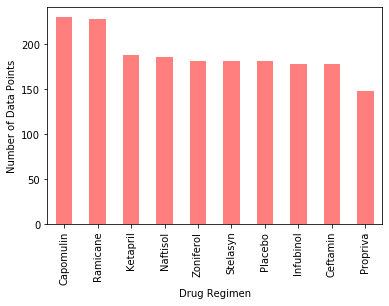

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

mouse_df_group2 = mouse_df_clean.groupby('Drug Regimen')

Count = mouse_df_group2['Mouse ID'].count()

Count = Count.sort_values(ascending=False)

ax = Count.plot(kind = 'bar', color = 'r', alpha = 0.5)

_= ax.set_ylabel('Number of Data Points')

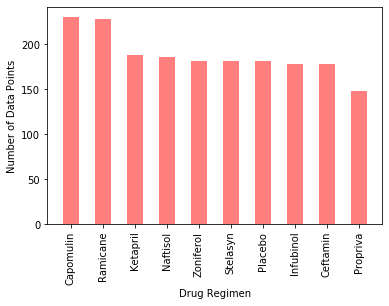

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

count_df = pd.DataFrame({'Drug Regimen': Count.index, 'Number of Data Points': Count.values})

plt.bar(count_df['Drug Regimen'], count_df['Number of Data Points'], color = 'r', alpha = 0.5, width = 0.5)

plt.xticks(rotation="vertical")

plt.xlabel('Drug Regimen')

_ = plt.ylabel('Number of Data Points')

## Pie Plots

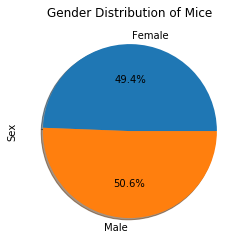

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_df_group3 = mouse_df.groupby('Sex')

Gender = mouse_df_group3['Sex'].count()

ax2 = Gender.plot(kind = 'pie', autopct = "%1.1f%%", shadow = True, title = 'Gender Distribution of Mice')

_ = ax2.set_ylabel('Sex')

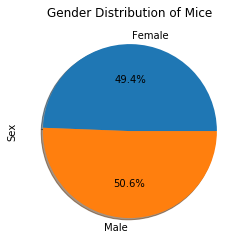

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Gender_df = pd.DataFrame({'Gender': Gender.index, 'Count': Gender.values})

plt.pie(Gender_df['Count'], labels = Gender_df['Gender'], autopct = "%1.1f%%", shadow = True)

plt.title('Gender Distribution of Mice')

_ = plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

mouse_df_treatment = mouse_df_clean.loc[mouse_df_clean['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol', 'Ceftamin'])]

mouse_df_treatment_f = mouse_df_treatment.sort_values(['Mouse ID','Timepoint']).groupby(['Drug Regimen','Mouse ID']).tail(1)

mouse_df_treatment_group = mouse_df_treatment_f.groupby('Drug Regimen')

quartiles = mouse_df_treatment_group['Tumor Volume (mm3)'].quantile([.25,.5,.75])

IQR_Capo = round(quartiles.Capomulin[0.75] - quartiles.Capomulin[0.25], 3)

IQR_Rami = round(quartiles.Ramicane[0.75] - quartiles.Ramicane[0.25], 3)

IQR_Infu = round(quartiles.Infubinol[0.75] - quartiles.Infubinol[0.25], 3)

IQR_Ceft = round(quartiles.Ceftamin[0.75] - quartiles.Ceftamin[0.25], 3)


print(f'The IQR for for final tumor volume for Capomulin treatment is {IQR_Capo}')

print(f'The IQR for for final tumor volume for Ramicane treatment is {IQR_Rami}')

print(f'The IQR for for final tumor volume for Infubinol treatment is {IQR_Infu}')

print(f'The IQR for for final tumor volume for Ceftamin treatment is {IQR_Ceft}')


Outliers_Capo = mouse_df_treatment_f.loc[(mouse_df_treatment_f['Drug Regimen'] == 'Capomulin') &
                                   ((mouse_df_treatment_f['Tumor Volume (mm3)'] < quartiles.Capomulin[0.25] - 1.5 * IQR_Capo) |
                                   (mouse_df_treatment_f['Tumor Volume (mm3)'] > quartiles.Capomulin[0.75] + 1.5 * IQR_Capo))]


Outliers_Rami = mouse_df_treatment_f.loc[(mouse_df_treatment_f['Drug Regimen'] == 'Ramicane') &
                                   ((mouse_df_treatment_f['Tumor Volume (mm3)'] < quartiles.Ramicane[0.25] - 1.5 * IQR_Rami) |
                                   (mouse_df_treatment_f['Tumor Volume (mm3)'] > quartiles.Ramicane[0.75] + 1.5 * IQR_Rami))]

Outliers_Infu = mouse_df_treatment_f.loc[(mouse_df_treatment_f['Drug Regimen'] == 'Infubinol') &
                                   ((mouse_df_treatment_f['Tumor Volume (mm3)'] < quartiles.Infubinol[0.25] - 1.5 * IQR_Infu) |
                                   (mouse_df_treatment_f['Tumor Volume (mm3)'] > quartiles.Infubinol[0.75] + 1.5 * IQR_Infu))]

Outliers_Ceft = mouse_df_treatment_f.loc[(mouse_df_treatment_f['Drug Regimen'] == 'Ceftamin') &
                                   ((mouse_df_treatment_f['Tumor Volume (mm3)'] < quartiles.Ceftamin[0.25] - 1.5 * IQR_Ceft) |
                                   (mouse_df_treatment_f['Tumor Volume (mm3)'] > quartiles.Ceftamin[0.75] + 1.5 * IQR_Ceft))]



Outliers_Infu

The IQR for for final tumor volume for Capomulin treatment is 7.782
The IQR for for final tumor volume for Ramicane treatment is 9.099
The IQR for for final tumor volume for Infubinol treatment is 11.477
The IQR for for final tumor volume for Ceftamin treatment is 15.578


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
214,c326,5,36.321346,0,Infubinol,Female,18,25


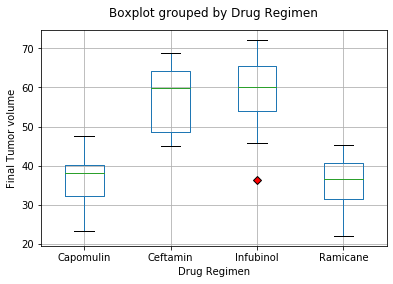

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_diamond = dict(markerfacecolor='r', marker='D')

mouse_df_treatment_f.boxplot(column = 'Tumor Volume (mm3)', by = 'Drug Regimen', flierprops = red_diamond)

_ = plt.title(" ")

_ = plt.ylabel("Final Tumor volume")

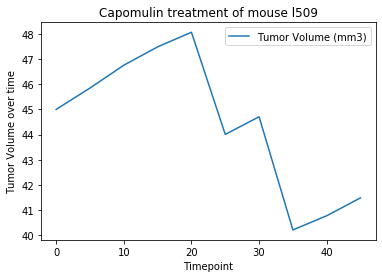

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


just_one_mouse = mouse_df_clean.loc[mouse_df_clean['Mouse ID'] == 'l509']


ax3 = just_one_mouse.plot(x = 'Timepoint', y = 'Tumor Volume (mm3)', kind = 'line', title = 'Capomulin treatment of mouse l509')

_ = ax3.set_ylabel('Tumor Volume over time')


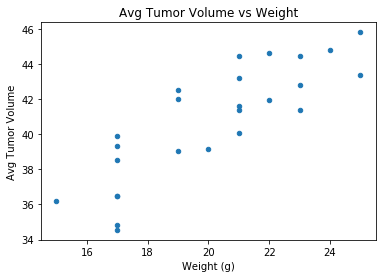

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_df_weight = mouse_df_clean.loc[(mouse_df_clean['Drug Regimen'] == 'Capomulin')]

mouse_df_weight_group = mouse_df_weight.groupby('Mouse ID')

Average = mouse_df_weight_group['Tumor Volume (mm3)'].mean()

Average_df = pd.DataFrame({'Mouse ID': Average.index, 'Avg Tumor Volume': Average.values})

weight_df = mouse_df_clean[["Mouse ID", 'Weight (g)']]

weight_df = weight_df.drop_duplicates(subset=['Mouse ID', 'Weight (g)'], keep= 'first')

weight_final = pd.merge(Average_df, weight_df, on = 'Mouse ID', how = 'left')

ax4 = weight_final.plot(x = 'Weight (g)', y = 'Avg Tumor Volume', kind = 'scatter', title = 'Avg Tumor Volume vs Weight')

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight_var = weight_final.iloc[:,2]

Avg_tumor = weight_final.iloc[:,1]

correlation = st.pearsonr(weight_var, Avg_tumor)

print(f"The correlation between the 2 variables is {round(correlation[0],2)}")

The correlation between the 2 variables is 0.84


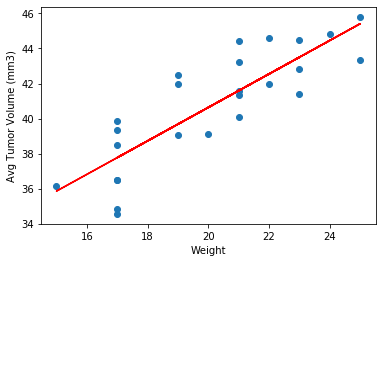

In [18]:
x_values = weight_var

y_values = Avg_tumor

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,25),fontsize=15,color="red")

_ = plt.xlabel('Weight')

_ = plt.ylabel('Avg Tumor Volume (mm3)')